In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
loan_df = pd.read_csv("dataset.csv")
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
loan_df.shape

(614, 13)

In [4]:
loan_df.duplicated().sum()

0

In [5]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
loan_df.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [7]:
loan_df.dropna(inplace=True)

In [8]:
loan_df.shape, loan_df.isna().sum()

((480, 13),
 Loan_ID              0
 Gender               0
 Married              0
 Dependents           0
 Education            0
 Self_Employed        0
 ApplicantIncome      0
 CoapplicantIncome    0
 LoanAmount           0
 Loan_Amount_Term     0
 Credit_History       0
 Property_Area        0
 Loan_Status          0
 dtype: int64)

In [16]:
loan_df["Dependents"].value_counts()

,count
Dependents,
0,274
2,85
1,80
3,41


In [15]:
loan_df["Dependents"].replace("3+", 3, inplace=True)

<ipython-input-15-40c106136d80>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_df["Dependents"].replace("3+", 3, inplace=True)


<Axes: xlabel='Education', ylabel='count'>

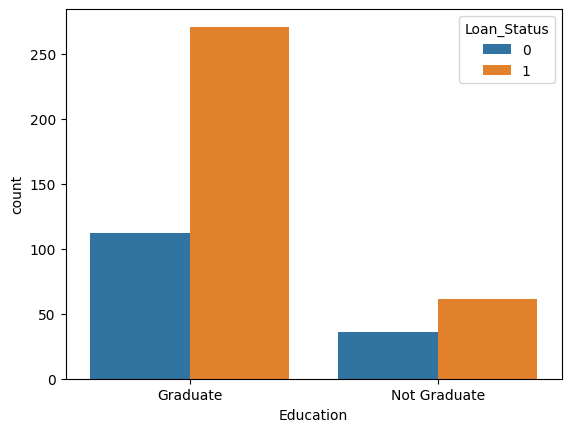

In [18]:
sns.countplot(x="Education", hue="Loan_Status", data=loan_df)

<Axes: xlabel='Education', ylabel='count'>

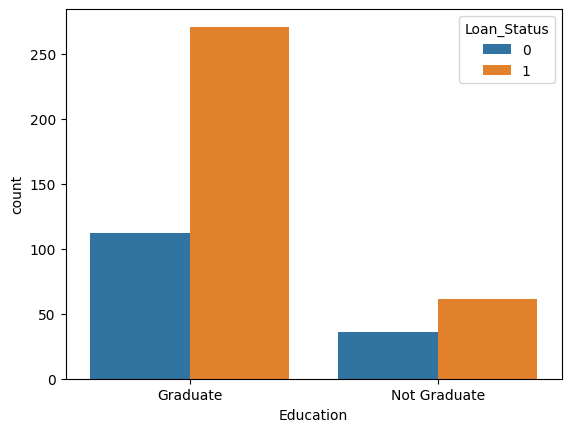

In [20]:
sns.countplot(x="Education", hue="Loan_Status", data=loan_df)

In [21]:
le = LabelEncoder()
cols = ["Married", "Gender", "Education", "Self_Employed", "Property_Area", "Loan_Status"]

for col in cols:
    loan_df[col] = le.fit_transform(loan_df[col])

In [22]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [26]:
from sklearn.model_selection import train_test_split

loan_id = loan_df["Loan_ID"]

X = loan_df.drop(columns=["Loan_ID", "Loan_Status"], axis=1)
y = loan_df["Loan_Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((432, 11), (48, 11), (432,), (48,))

In [27]:
X_train.head(), y_train.head()

(     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
 200       1        1          1          1              0             2600   
 78        1        1          3          0              0             3167   
 500       0        0          0          0              0              645   
 434       1        0          0          0              0             3750   
 531       1        1          3          0              0             4281   
 
      CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
 200             2500.0        90.0             360.0             1.0   
 78              4000.0       180.0             300.0             0.0   
 500             3683.0       113.0             480.0             1.0   
 434                0.0       100.0             360.0             1.0   
 531                0.0       100.0             360.0             1.0   
 
      Property_Area  
 200              1  
 78               1  
 500              

In [30]:
classifier = svm.SVC(kernel='linear')

In [32]:
#training the support Vector Macine model
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [34]:
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,y_train)

In [40]:
y_pred = classifier.predict(X_test)
test_data_accuray = accuracy_score(y_pred,y_test)

In [41]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8125


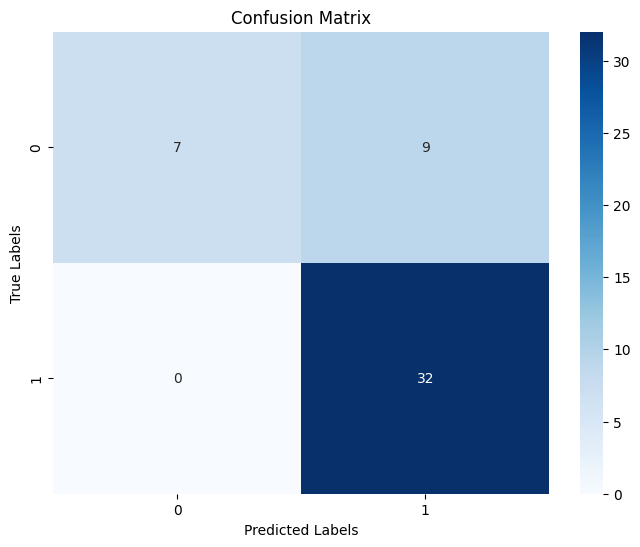

In [43]:
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [44]:
import pickle

pickle.dump(classifier, open('model.pkl', 'wb'))